In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

In [2]:
L = 50e-3

def lip_const_func(z):
    return 1 if abs(z) < 0.1*L else 0
    
vfw = VectorialFrozenWave(centered=True)
vfw.vacuum_wavelength = 1064e-9
vfw.medium_refractive_index = 1.33
vfw.N = 25
vfw.L = L
vfw.Q = 0.9994*vfw.wavenumber
vfw.reference_function = lip_const_func

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


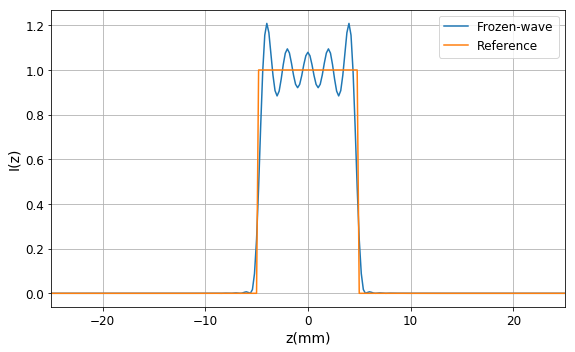

In [3]:
z = np.linspace(-L/2, L/2, 251)

fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

plt.plot([z*1e3 for z in z], [vfw.intensity(0, 0, z) for z in z], label='Frozen-wave')
plt.plot([z*1e3 for z in z], [vfw.reference_function(z)**2 for z in z], label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e3, L/2*1e3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-perfil-2D.png')
plt.show()

1/28
start: 17 Jul 2017 23:05:32
time: 26.432756423950195

2/28
start: 17 Jul 2017 23:05:58
time: 19.87342071533203

3/28
start: 17 Jul 2017 23:06:18
time: 10.134600162506104

4/28
start: 17 Jul 2017 23:06:28
time: 8.380959510803223

5/28
start: 17 Jul 2017 23:06:36
time: 8.760162591934204

6/28
start: 17 Jul 2017 23:06:45
time: 8.934881687164307

7/28
start: 17 Jul 2017 23:06:54
time: 9.477579832077026

8/28
start: 17 Jul 2017 23:07:04
time: 9.561604976654053

9/28
start: 17 Jul 2017 23:07:13
time: 57.10159158706665

10/28
start: 17 Jul 2017 23:08:10
time: 8.98724365234375

11/28
start: 17 Jul 2017 23:08:19
time: 8.361374855041504

12/28
start: 17 Jul 2017 23:08:28
time: 12.026711702346802

13/28
start: 17 Jul 2017 23:08:40
time: 8.233153343200684

14/28
start: 17 Jul 2017 23:08:48
time: 11.66156816482544

15/28
start: 17 Jul 2017 23:09:00
time: 9.401907920837402

16/28
start: 17 Jul 2017 23:09:09
time: 8.130081176757812

17/28
start: 17 Jul 2017 23:09:17
time: 7.263937711715698

18/2

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


time: 56.45181918144226

50/73
start: 18 Jul 2017 00:17:16
time: 38.01633834838867

51/73
start: 18 Jul 2017 00:17:54
time: 46.01061749458313

52/73
start: 18 Jul 2017 00:18:40
time: 119.96655440330505

53/73
start: 18 Jul 2017 00:20:40
time: 38.308910608291626

54/73
start: 18 Jul 2017 00:21:18
time: 38.08921146392822

55/73
start: 18 Jul 2017 00:21:56
time: 38.53633141517639

56/73
start: 18 Jul 2017 00:22:35
time: 39.46790337562561

57/73
start: 18 Jul 2017 00:23:15
time: 38.872884035110474

58/73
start: 18 Jul 2017 00:23:53
time: 41.184325218200684

59/73
start: 18 Jul 2017 00:24:35
time: 41.6372594833374

60/73
start: 18 Jul 2017 00:25:16
time: 37.87933397293091

61/73
start: 18 Jul 2017 00:25:54
time: 39.63157606124878

62/73
start: 18 Jul 2017 00:26:34
time: 39.737587451934814

63/73
start: 18 Jul 2017 00:27:13
time: 55.23655652999878

64/73
start: 18 Jul 2017 00:28:09
time: 157.34777998924255

65/73
start: 18 Jul 2017 00:30:46
time: 32.17471504211426

66/73
start: 18 Jul 2017 0

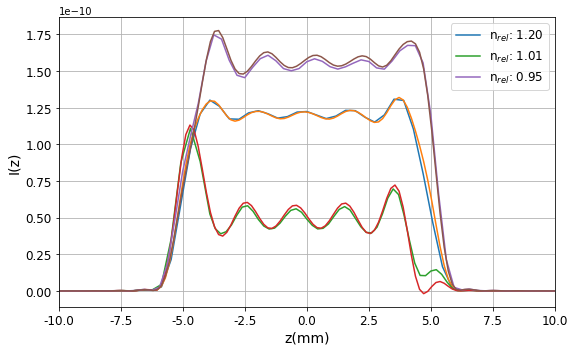

In [10]:
# LIP Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

emtdata = pd.read_csv('EMTheoryData.csv', index_col=0)
factor = 11.1

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -2*L/10,
          'stop': 2*L/10,
          'num': 50,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X1, [1*f for f in F1], label=label)
plt.plot(emtdata.index, [data*factor for data in emtdata['120']][::-1])

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X2, [100*f for f in F2], label=label)
plt.plot(emtdata.index, [data*factor*100 for data in emtdata['101']][::-1])

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X3, [10*f for f in F3], label=label)
plt.plot(emtdata.index, [data*factor*10 for data in emtdata['095']][::-1])

plt.xlim([-0.2*L, 0.2*L])

xlocs, xlabs = plt.xticks()
plt.xticks(xlocs, [xl*1e3 for xl in xlocs])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-longit-forces.png')

plt.show()